<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Classification%20%26%20Regression/Support%20Vector%20Machine/Support%20Vector%20Classifier/SupportVectorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Creating a synthetic data points:
from sklearn.datasets import make_classification

In [68]:
X,y = make_classification(n_samples= 1000, n_features=2, n_redundant = 0, n_classes = 2, n_clusters_per_class = 2)

In [69]:
X

array([[ 2.04084762, -0.21798631],
       [ 1.09086285,  0.64776483],
       [-1.15294443,  1.59056234],
       ...,
       [ 0.9789085 ,  0.95126425],
       [-1.24879462,  2.2419528 ],
       [-1.17530148,  1.82432393]])

In [70]:
X.shape

(1000, 2)

In [71]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [72]:
y.shape

(1000,)

In [73]:
df = pd.DataFrame(X)

In [74]:
df[0]

,0
0,2.040848
1,1.090863
2,-1.152944
3,0.384665
4,-1.312234
...,...
995,-1.502485
996,-0.704962
997,0.978909
998,-1.248795


<Axes: xlabel='0', ylabel='1'>

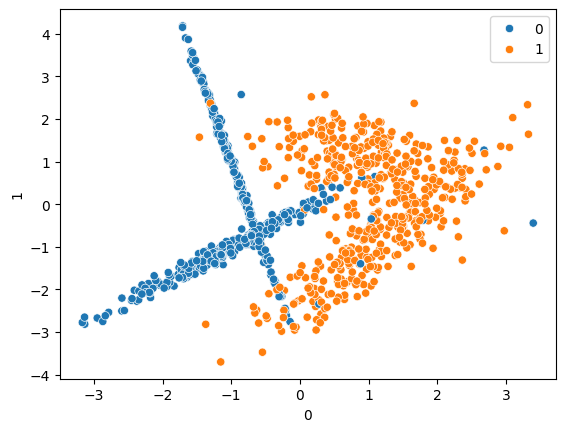

In [75]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.26,random_state=42)


In [77]:
X_train.shape

(740, 2)

In [78]:
X_test.shape

(260, 2)

1. LINEAR KERNEL(SVC)

In [79]:
#model
from sklearn.svm import SVC
svc = SVC(kernel='linear')
#many parameter to play for hyperparamter tuning
#data points clearly seperated can choose linear kernel

In [80]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [81]:
y_pred=svc.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
error=mean_squared_error(y_pred,y_test)

In [83]:
print("Error:",error)

Error: 0.07692307692307693


In [84]:
print("Accuracy:", accuracy_score(y_pred,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 92.3076923076923
Confusion Matrix:
 [[114   8]
 [ 12 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       122
           1       0.94      0.91      0.93       138

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



In [93]:
svc.intercept_, svc.coef_
#for linear can get coefficent as well
#these are the parameters for the model

(array([0.19333747]), array([[2.0059519 , 0.05256246]]))

HYPERPARAMETER TUNING:

In [88]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#svc paramters like c value, kernel value, degree, gamma,
#shrinking, probability, total,
param_grid = {'C': [0.1, 1, 10, 10.100, 100, 111, 1000],
              'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
              'kernel': ['linear']
}
#if refit then it refits for every cross validation.

cv=StratifiedKFold(n_splits=5)
grid=GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=cv, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.892 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10.1, 100, 111, 1000],
                         'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
                         'kernel': ['linear']},
             verbose=3)

In [89]:
grid.best_params_
#this shows best parameters that are selected from all above

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [90]:
y_pred_hpt=grid.predict(X_test)
error_hpt=mean_squared_error(y_pred_hpt,y_test)
print("Error:",error_hpt)

print("Accuracy:", accuracy_score(y_pred_hpt,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_hpt))
print("Classification Report:\n", classification_report(y_pred_hpt,y_test))


Error: 0.07307692307692308
Accuracy: 92.6923076923077
Confusion Matrix:
 [[114   8]
 [ 11 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.92      0.94      0.93       135

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260



Accuracy increased from 92.30 to 92.69 by hyperparameter tuning (selecting best paraameters)

2. RBF KERNEL(SVC)

In [85]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)
y_pred_rbf=svc_rbf.predict(X_test)
error_rbf=mean_squared_error(y_pred_rbf,y_test)
print("Error:",error_rbf)

print("Accuracy:", accuracy_score(y_pred_rbf,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_rbf))
print("Classification Report:\n", classification_report(y_pred_rbf,y_test))


Error: 0.03076923076923077
Accuracy: 96.92307692307692
Confusion Matrix:
 [[117   5]
 [  3 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       120
           1       0.98      0.96      0.97       140

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



In [96]:
svc_rbf.intercept_

array([-0.02452949])

HYPERPARAMETER TUNING:

In [97]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#svc paramters like c value, kernel value, degree, gamma,
#shrinking, probability, total,
param_grid_rbf = {'C': [0.1, 1, 10, 10.100, 100, 111, 1000],
              'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
              'kernel': ['rbf']
}
#if refit then it refits for every cross validation.

cv=StratifiedKFold(n_splits=5)
grid_rbf=GridSearchCV(SVC(), param_grid=param_grid_rbf, refit=True, cv=cv, verbose=3)
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10.1, 100, 111, 1000],
                         'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
                         'kernel': ['rbf']},
             verbose=3)

In [98]:
grid_rbf.best_params_
#this shows best parameters that are selected from all above

{'C': 1, 'gamma': 1.1, 'kernel': 'rbf'}

In [99]:
y_pred_hpt_rbf=grid_rbf.predict(X_test)
error_hpt_rbf=mean_squared_error(y_pred_hpt_rbf,y_test)
print("Error:",error_hpt_rbf)

print("Accuracy:", accuracy_score(y_pred_hpt_rbf,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_hpt_rbf))
print("Classification Report:\n", classification_report(y_pred_hpt_rbf,y_test))


Error: 0.026923076923076925
Accuracy: 97.3076923076923
Confusion Matrix:
 [[117   5]
 [  2 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       0.99      0.96      0.97       141

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



3. POLYNOMIAL KERNEL(SVC)

In [86]:
svc_ply = SVC(kernel='poly')
svc_ply.fit(X_train,y_train)
y_pred_ply=svc_ply.predict(X_test)
error_ply=mean_squared_error(y_pred_ply,y_test)
print("Error:",error_ply)

print("Accuracy:", accuracy_score(y_pred_ply,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_ply))
print("Classification Report:\n", classification_report(y_pred_ply,y_test))


Error: 0.08846153846153847
Accuracy: 91.15384615384615
Confusion Matrix:
 [[121   1]
 [ 22 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       143
           1       0.84      0.99      0.91       117

    accuracy                           0.91       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.91      0.91       260



In [101]:
svc_ply.intercept_

array([-0.33568767])

HYPERPARAMETER TUNING:

In [102]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#svc paramters like c value, kernel value, degree, gamma,
#shrinking, probability, total,
param_grid_ply = {'C': [0.1, 1, 10, 10.100, 100, 111, 1000],
              'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
              'kernel': ['poly']
}
#if refit then it refits for every cross validation.

cv=StratifiedKFold(n_splits=5)
grid_ply=GridSearchCV(SVC(), param_grid=param_grid_ply, refit=True, cv=cv, verbose=3)
grid_ply.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.932 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.878 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.885 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.912 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.926 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.703 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.777 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.635 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.743 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.730 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.514 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10.1, 100, 111, 1000],
                         'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
                         'kernel': ['poly']},
             verbose=3)

In [103]:
grid_ply.best_params_
#this shows best parameters that are selected from all above

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [104]:
y_pred_hpt_ply=grid_ply.predict(X_test)
error_hpt_ply=mean_squared_error(y_pred_hpt_ply,y_test)
print("Error:",error_hpt_ply)

print("Accuracy:", accuracy_score(y_pred_hpt_ply,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_hpt_ply))
print("Classification Report:\n", classification_report(y_pred_hpt_ply,y_test))


Error: 0.08846153846153847
Accuracy: 91.15384615384615
Confusion Matrix:
 [[121   1]
 [ 22 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       143
           1       0.84      0.99      0.91       117

    accuracy                           0.91       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.91      0.91       260



4. SIGMOID KERNEL(SVC)

In [87]:
svc_sgd = SVC(kernel='sigmoid')
svc_sgd.fit(X_train,y_train)
y_pred_sgd=svc_sgd.predict(X_test)
error_sgd=mean_squared_error(y_pred_sgd,y_test)
print("Error:",error_sgd)

print("Accuracy:", accuracy_score(y_pred_sgd,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_sgd))
print("Classification Report:\n", classification_report(y_pred_sgd,y_test))


Error: 0.2153846153846154
Accuracy: 78.46153846153847
Confusion Matrix:
 [[103  19]
 [ 37 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       140
           1       0.73      0.84      0.78       120

    accuracy                           0.78       260
   macro avg       0.79      0.79      0.78       260
weighted avg       0.79      0.78      0.78       260



HYPERPARAMETER TUNING:

In [105]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#svc paramters like c value, kernel value, degree, gamma,
#shrinking, probability, total,
param_grid_smd = {'C': [0.1, 1, 10, 10.100, 100, 111, 1000],
              'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
              'kernel': ['linear']
}
#if refit then it refits for every cross validation.

cv=StratifiedKFold(n_splits=5)
grid_smd=GridSearchCV(SVC(), param_grid=param_grid_smd, refit=True, cv=cv, verbose=3)
grid_smd.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.892 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10.1, 100, 111, 1000],
                         'gamma': [1, 0.1, 0.001, 0.01, 0.0001, 1.1, 1.01],
                         'kernel': ['linear']},
             verbose=3)

In [106]:
grid_smd.best_params_
#this shows best parameters that are selected from all above

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [107]:
y_pred_hpt_smd=grid_smd.predict(X_test)
error_hpt_smd=mean_squared_error(y_pred_hpt_smd,y_test)
print("Error:",error_hpt_smd)

print("Accuracy:", accuracy_score(y_pred_hpt_smd,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_hpt_smd))
print("Classification Report:\n", classification_report(y_pred_hpt_smd,y_test))


Error: 0.07307692307692308
Accuracy: 92.6923076923077
Confusion Matrix:
 [[114   8]
 [ 11 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.92      0.94      0.93       135

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

